<a href="https://colab.research.google.com/github/saigirishgilly98/Data-Analytics-Project/blob/main/ChurnPredictionUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">**Churn prediction and Item recommendation on online retail dataset**</font>

## **Problem Statement**:

Given a transactional dataset, tasks to perform : <font color="blue">Exploratory Data Analysis (EDA), Data pre-processing, Customer Segmentation, User profiling, Item recommendation for each users and churn prediction</font>

# <font color="blue">**Exploratory Data Analysis (EDA)**</font>

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the csv file into dataframe
dataset = pd.read_csv('data.csv', encoding='unicode_escape')
dataset.head(10) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
# Exploring number of observations and attributes
dataset.shape

(541909, 8)

In [ ]:
# Exploring names of the attributes
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Exploring the types of the attributes
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Exploring the statistics of the numerical attributes
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# <font color="blue">**Data Pre-Processing**</font>

## **Imputation**

In [ ]:
# calculating number of missing values in each of the attributes
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# threshold to drop the observations if the proportion of null values is more than the threshold.
threshold = 0.4

In [ ]:
# proportion of null values in description attribute
dataset['Description'].isnull().sum() / dataset.shape[0]

0.002683107311375157

The proportion of null values in `Description` attribute is less than the `threshold`, hence safe to drop the observations with null values.

In [ ]:
# Dropping the observations with null values for Description attribute
dataset.dropna(subset=['Description'], inplace=True)

In [ ]:
# Validation of the dropped observations with null values for Description attribute
dataset['Description'].isnull().sum()

0

In [ ]:
# proportion of null values in CustomerID attribute
dataset['CustomerID'].isnull().sum() / dataset.shape[0]

0.24724722687365275

The proportion of null values in `CustomerID` attribute is less than the `threshold`, hence safe to drop the observations with null values.


In [ ]:
# Dropping the observations with null values for customerID attribute
dataset.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Validation of the dropped observations with null values for CustomerID attribute
dataset['CustomerID'].isnull().sum()

0

In [ ]:
# New shape of the dataset after dropping the observation with null values
dataset.shape

(406829, 8)

In [ ]:
# No attribute with null values
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Binning**

In [ ]:
# Obtaining the classes of Country categorical attribute 
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
# Obtaining the counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Replacing the `Country` name class with `others` whose frequency is less than 100

In [ ]:
dataset['Country'] = dataset['Country'].replace(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'], 'Others')

In [ ]:
# Obtaining the new counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Others                356
Poland                341
USA                   291
Israel                250
Unspecified           244
Singapore             229
Iceland               182
Canada                151
Greece                146
Malta                 127
Name: Country, dtype: int64

## **Removing and handling Outliers**

Removing the outlier rows by using InterQuartile range

In [ ]:
# Statistical description of Quantity attribute
dataset['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# Obtaining q1, q3, iqr, upper and lower limits for Quantity attribute
a = []
a = np.sort(dataset['Quantity'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 27.0
lower limit : -3.0


In [ ]:
# Removing the outliers by filtering
dataset = dataset[(dataset['Quantity'] < upper_lim) & (dataset['Quantity'] > lower_lim)]

In [ ]:
# Statistical description of UnitPrice attribute
dataset['UnitPrice'].describe()

count    377398.000000
mean          3.601225
std          71.955740
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# Obtaining q1, q3, iqr, upper and lower limits for UnitPrice attribute
a = []
a = np.sort(dataset['UnitPrice'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 7.5
lower limit : 0.0


In [ ]:
# Removing the outliers by filtering
dataset = dataset[(dataset['UnitPrice'] < upper_lim) & (dataset['UnitPrice'] > lower_lim)]

In [ ]:
# Obtaining the negative and 0 values of Quantity attribute
a = []
for i in dataset['Quantity']:
  if i <= 0:
    a.append(i)

print(a)

[-1, -1, -2, -1, -1, -1, -2, -1, -1, -2, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -2, -1, -2, -1, -2, -1, -1, -1, -1, -2, -1, -1, -1, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -2, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -2, -1, -2, -1, -1, -1, -2, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1,

In [ ]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['Quantity'] > 0]

In [ ]:
# Obtaining the negative and 0 values of UnitPrice attribute
b = []
for i in dataset['UnitPrice']:
  if i <= 0:
    b.append(i)
print(b)

[]


In [ ]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['UnitPrice'] > 0]

In [ ]:
# New shape of the dataset
dataset.shape

(337527, 8)

## **Log Transformation**

In [ ]:
# Applying log transformation on Quantity and UnitPrice attributes
dataset['Log_Transformed_Quantity'] = dataset['Quantity'].transform(np.log1p)
dataset['Log_Transformed_UnitPrice'] = dataset['UnitPrice'].transform(np.log1p)

In [ ]:
# Exploring the dataset after transformations
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402


## **Scaling**

### 1. Normalization

In [ ]:
dataset['Normalized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].min()) / (dataset['Quantity'].max() - dataset['Quantity'].min())

dataset['Normalized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].min()) / (dataset['UnitPrice'].max() - dataset['UnitPrice'].min()) 

### 2. Standardization

In [ ]:
dataset['Standardized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].mean()) / dataset['Quantity'].std()

dataset['Standardized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].mean()) / dataset['UnitPrice'].std()

In [ ]:
# Exploring the dataset after scaling
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203


## **Date & Time extraction**

In [ ]:
# Creating the attributes for date, month, year, weekday and time of InvoiceDate
dataset['Date'] = pd.to_datetime(dataset['InvoiceDate']).dt.day

dataset['Month'] = pd.to_datetime(dataset['InvoiceDate']).dt.month

dataset['Year'] = pd.to_datetime(dataset['InvoiceDate']).dt.year

dataset['Weekday'] = pd.to_datetime(dataset['InvoiceDate']).dt.day_name()

dataset['Time'] = pd.to_datetime(dataset['InvoiceDate']).dt.time

In [ ]:
# Exploring the created date, day, time attributes
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.569647,-0.219014,1.350697,1,12,2010,Wednesday,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.247888,-0.219014,-0.217563,1,12,2010,Wednesday,08:28:00
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.281405,-0.219014,-0.054203,1,12,2010,Wednesday,08:34:00


## **Visual Representation**

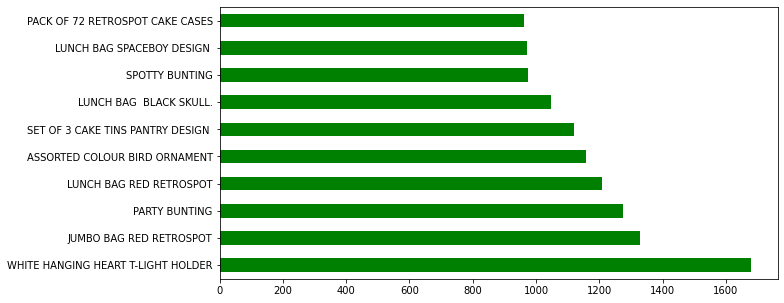

In [ ]:
# Exploring the description of the 10 products with the highest count
dataset['Description'].value_counts()[:10].plot(kind='barh', color='green', figsize=(10, 5))

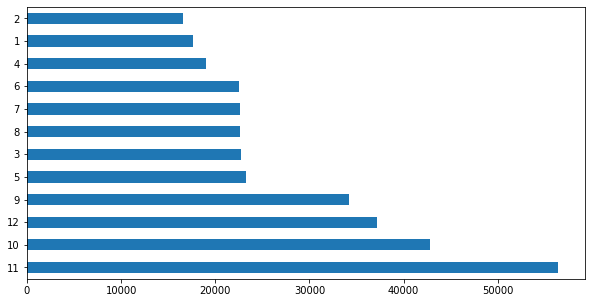

In [ ]:
# Exploring the sales in different months
dataset['Month'].value_counts().plot(kind='barh', figsize=(10,5))

From the graph, we can interpret that November recorded most sales and February recorded least sales.

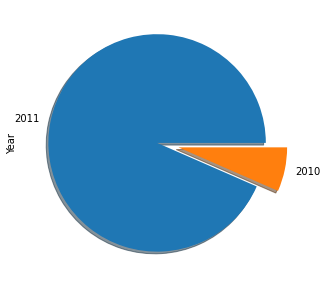

In [ ]:
# Exploring the number of sales by year
dataset['Year'].value_counts().plot(kind='pie', explode=(0,0.2), shadow=True, figsize=(10,5))

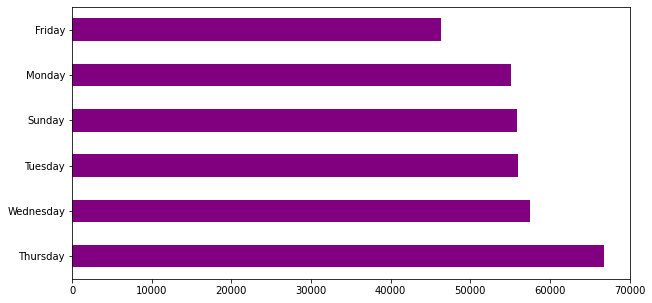

In [ ]:
# Exploring the number of sales by days
dataset['Weekday'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

From the above graph, we can interpret that the store used to be closed on saturdays and the maximum sales used to happen on thursday as opposed to the least sales on Friday.

# <font color="blue">**Customer Segmentation**</font>

In [ ]:
# Exploring the dataset grouped by InvoiceNo and Description
dataset.groupby(['InvoiceNo', 'Description']).size()[:50]

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         1
           GLASS STAR FROSTED T-LIGHT HOLDER      1
           KNITTED UNION FLAG HOT WATER BOTTLE    1
           RED WOOLLY HOTTIE WHITE HEART.         1
           WHITE HANGING HEART T-LIGHT HOLDER     1
           WHITE METAL LANTERN                    1
536366     HAND WARMER RED POLKA DOT              1
           HAND WARMER UNION JACK                 1
536367     BOX OF 6 ASSORTED COLOUR TEASPOONS     1
           BOX OF VINTAGE JIGSAW BLOCKS           1
           FELTCRAFT PRINCESS CHARLOTTE DOLL      1
           HOME BUILDING BLOCK WORD               1
           IVORY KNITTED MUG COSY                 1
           LOVE BUILDING BLOCK WORD               1
           POPPY'S PLAYHOUSE BEDROOM              1
           POPPY'S PLAYHOUSE KITCHEN              1
536368     BLUE COAT RACK PARIS FASHION           1
           JAM MAKING SET WITH JARS               1
           RED CO

In [ ]:
# Exploring the dataset grouped by CustomerID and Description
dataset.groupby(['CustomerID', 'Description']).size()

CustomerID  Description                      
12347.0     3D DOG PICTURE PLAYING CARDS         3
            3D SHEET OF CAT STICKERS             1
            3D SHEET OF DOG STICKERS             1
            60 TEATIME FAIRY CAKE CASES          3
            72 SWEETHEART FAIRY CAKE CASES       3
                                                ..
18287.0     SMALL YELLOW BABUSHKA NOTEBOOK       1
            STAR T-LIGHT HOLDER WILLIE WINKIE    1
            STRAWBERRY CERAMIC TRINKET BOX       1
            SWISS CHALET TREE DECORATION         2
            TREE T-LIGHT HOLDER WILLIE WINKIE    1
Length: 232548, dtype: int64

## **1. Products Ordered**

In [ ]:
def encode_column(column):
  if column > 0:
    return 1
  if column <= 0:
    return 0

# Function to get the count of the products ordered
def aggregate_by_ordered_quantity(dataframe, column_list):

  aggregated_dataframe = dataframe.groupby(column_list).Quantity.count().reset_index()

  aggregated_dataframe['Products_ordered'] = aggregated_dataframe.Quantity.apply(encode_column)

  final_dataframe = aggregated_dataframe.groupby(column_list[0]).Products_ordered.sum().reset_index()

  return final_dataframe

In [ ]:
# Creating customers dataframe
customers = aggregate_by_ordered_quantity(dataset, ['CustomerID', 'Description'])

customers.head()

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49


## **2. Total Spending**

Creating a `Sales` attribute which is product of `Quantity` and `UnitPrice`.

In [ ]:
dataset['Sales'] = dataset['Quantity'] * dataset['UnitPrice']

# Exploring the dataset to validate the Sales attribute
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34


In [ ]:
# Obtaining customers total spending
customer_total_spending = dataset.groupby('CustomerID').Sales.sum().reset_index()

customer_total_spending.rename(columns = {'Sales' : 'Total_spending'}, inplace = True)

In [ ]:
# Merging the two dataframes on CustomerID
customers = pd.merge(customers, customer_total_spending, on='CustomerID')

print(f'The number of customers from the existing customer base : {customers.shape[0]}')

customers.head()

The number of customers from the existing customer base : 4190


,CustomerID,Products_ordered,Total_spending
0,12347.0,96,3314.73
1,12348.0,6,90.20
2,12349.0,57,984.15
3,12350.0,16,294.40
4,12352.0,49,1130.94


## **Scaling using Log1p transform**

In [ ]:
# Function to apply log1p transformation
def apply_log1p_transformation(dataframe, column):

  dataframe['log_' + column] = np.log1p(dataframe[column])
  return dataframe['log_' + column]

### 1. Products ordered

In [ ]:
apply_log1p_transformation(customers, 'Products_ordered')

0       4.574711
1       1.945910
2       4.060443
3       2.833213
4       3.912023
          ...   
4185    2.197225
4186    1.791759
4187    2.197225
4188    5.594711
4189    3.850148
Name: log_Products_ordered, Length: 4190, dtype: float64

### 2. Total spending

In [ ]:
apply_log1p_transformation(customers, 'Total_spending')

0       8.106433
1       4.513055
2       6.892794
3       5.688330
4       7.031688
          ...   
4185    4.927254
4186    3.869533
4187    4.737338
4188    7.627048
4189    6.868765
Name: log_Total_spending, Length: 4190, dtype: float64

In [ ]:
# Exploring the dataset to validate the log transformed attributes
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending
0,12347.0,96,3314.73,4.574711,8.106433
1,12348.0,6,90.20,1.945910,4.513055
2,12349.0,57,984.15,4.060443,6.892794
3,12350.0,16,294.40,2.833213,5.688330
4,12352.0,49,1130.94,3.912023,7.031688


## **Feature Selection**

In [ ]:
customers.iloc[:,3:]

,log_Products_ordered,log_Total_spending
0,4.574711,8.106433
1,1.945910,4.513055
2,4.060443,6.892794
3,2.833213,5.688330
4,3.912023,7.031688
...,...,...
4185,2.197225,4.927254
4186,1.791759,3.869533
4187,2.197225,4.737338
4188,5.594711,7.627048


# <font color="blue">**K-Means Clustering**</font>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

kmeans_model.fit(customers.iloc[:,3:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Intracluster distance

In [ ]:
print(f'Intracluster distance of the model is: ', kmeans_model.inertia_)

Intracluster distance of the model is:  1197.6768152532238


This distance needs to be minimized by finding optimal hyper paramter.

## **Hyperparameter tuning**

In [ ]:
def make_list_of_K(K, dataframe):

  cluster_values = list(range(1, K+1))
  inertia_values = []

  for c in cluster_values:
    model = KMeans(n_clusters=c, init='k-means++', max_iter=500, random_state=42)
    model.fit(dataframe)
    inertia_values.append(model.inertia_)
  
  return inertia_values

In [ ]:
# Checking for k values between 1 to 15
results = make_list_of_K(15, customers.iloc[:, 3:])

In [ ]:
k_values_distances = pd.DataFrame({'clusters': list(range(1, 16)), 'Intracluster distances': results})

print(k_values_distances)

    clusters  Intracluster distances
0          1            11756.716152
1          2             4790.968733
2          3             2965.444740
3          4             2211.197176
4          5             1810.651161
5          6             1565.831656
6          7             1354.825184
7          8             1197.676815
8          9             1054.114349
9         10              957.658328
10        11              873.862032
11        12              799.969961
12        13              745.265932
13        14              701.321098
14        15              660.753548


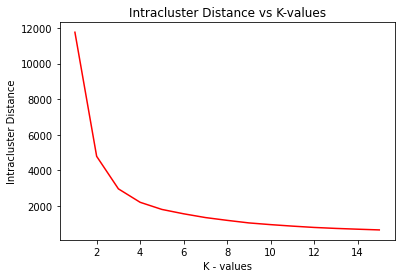

In [ ]:
plt.plot(k_values_distances['clusters'], k_values_distances['Intracluster distances'], color='red')
plt.xlabel('K - values')
plt.ylabel('Intracluster Distance')
plt.title('Intracluster Distance vs K-values')
plt.show()

From the graph, its clear that after k = 4, the descent gets stabilized so the optimal k is 4.  

In [ ]:
# Updating model with optimal k
updated_kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42)

updated_kmeans_model.fit_predict(customers.iloc[:, 3:])

array([3, 1, 0, ..., 1, 3, 0], dtype=int32)

## Adding cluster centers

In [ ]:
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_

actual_data = np.expm1(cluster_centers)

add_points = np.append(actual_data, cluster_centers, axis=1)

add_points

array([[5.01698019e+01, 7.63545604e+02, 3.93514955e+00, 6.63928168e+00],
       [4.65081991e+00, 7.68378454e+01, 1.73180065e+00, 4.35462776e+00],
       [1.83642140e+01, 2.63280006e+02, 2.96342672e+00, 5.57700917e+00],
       [1.31292199e+02, 2.67581235e+03, 4.88501311e+00, 7.89238194e+00]])

In [ ]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers['clusters'] = updated_kmeans_model.labels_

In [ ]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=['Products_ordered', 'Total_spending', 'log_Products_ordered', 'log_Total_spending', 'clusters'])

centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,50.169802,763.545604,3.935150,6.639282,0.0
1,4.650820,76.837845,1.731801,4.354628,1.0
2,18.364214,263.280006,2.963427,5.577009,2.0
3,131.292199,2675.812348,4.885013,7.892382,3.0


In [ ]:
# Changing the type of clusters attribute to int
centers_df['clusters'] = centers_df['clusters'].astype('int')
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,50.169802,763.545604,3.935150,6.639282,0
1,4.650820,76.837845,1.731801,4.354628,1
2,18.364214,263.280006,2.963427,5.577009,2
3,131.292199,2675.812348,4.885013,7.892382,3


In [ ]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,12347.0,96,3314.73,4.574711,8.106433,3
1,12348.0,6,90.20,1.945910,4.513055,1
2,12349.0,57,984.15,4.060443,6.892794,0
3,12350.0,16,294.40,2.833213,5.688330,2
4,12352.0,49,1130.94,3.912023,7.031688,0
5,12353.0,2,29.30,1.098612,3.411148,1
6,12354.0,40,682.69,3.713572,6.527505,0
7,12355.0,9,219.00,2.302585,5.393628,2
8,12356.0,33,1086.56,3.526361,6.991692,0
9,12357.0,95,3195.41,4.564348,8.069784,3


## **Cluster Visualization**

In [ ]:
# Creating the attribute Cluster_name
customers['Cluster_name'] = customers['clusters'].astype(str)

customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,3,3
1,12348.0,6,90.20,1.945910,4.513055,1,1
2,12349.0,57,984.15,4.060443,6.892794,0,0
3,12350.0,16,294.40,2.833213,5.688330,2,2
4,12352.0,49,1130.94,3.912023,7.031688,0,0
5,12353.0,2,29.30,1.098612,3.411148,1,1
6,12354.0,40,682.69,3.713572,6.527505,0,0
7,12355.0,9,219.00,2.302585,5.393628,2,2
8,12356.0,33,1086.56,3.526361,6.991692,0,0
9,12357.0,95,3195.41,4.564348,8.069784,3,3


In [ ]:
# Obtaining the value counts of all the clusters.
magnitude_df = pd.DataFrame(customers.Cluster_name.value_counts().reset_index())

magnitude_df.rename(columns={'index':'Customer Groups', 'Cluster_name': 'Customer Group Magnitude'}, inplace=True)

magnitude_df

,Customer Groups,Customer Group Magnitude
0,2,1384
1,0,1348
2,3,805
3,1,653


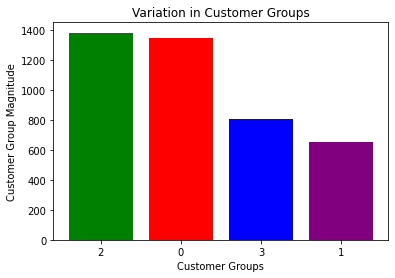

In [ ]:
# Plotting the bar graph to interpret the number of customers in each clusters
plt.bar(magnitude_df['Customer Groups'], magnitude_df['Customer Group Magnitude'], color=['green', 'red', 'blue', 'purple'])
plt.xlabel('Customer Groups')
plt.ylabel('Customer Group Magnitude')
plt.title('Variation in Customer Groups')
plt.show()

# <font color="blue">**Customer Profiling**</font>

## Number of products brought by each customerID

In [ ]:
customers.iloc[:,:2]

,CustomerID,Products_ordered
0,12347.0,96
1,12348.0,6
2,12349.0,57
3,12350.0,16
4,12352.0,49
...,...,...
4185,18280.0,8
4186,18281.0,5
4187,18282.0,8
4188,18283.0,268


## Total bill of each customerID

In [ ]:
customers[['CustomerID', 'Total_spending']]

,CustomerID,Total_spending
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,984.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4185,18280.0,137.00
4186,18281.0,46.92
4187,18282.0,113.13
4188,18283.0,2051.98


## **Customers Grouping based on customer segmentation**

### **Group 0**

In [ ]:
customers[customers['clusters'] == 0]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
2,12349.0,57,984.15,4.060443,6.892794,0,0
4,12352.0,49,1130.94,3.912023,7.031688,0,0
6,12354.0,40,682.69,3.713572,6.527505,0,0
8,12356.0,33,1086.56,3.526361,6.991692,0,0
16,12364.0,67,1106.28,4.219508,7.009662,0,0
...,...,...,...,...,...,...,...
4168,18252.0,81,385.67,4.406719,5.957572,0,0
4171,18259.0,26,2203.60,3.295837,7.698301,0,0
4175,18263.0,49,1042.40,3.912023,6.950240,0,0
4176,18265.0,34,609.11,3.555348,6.413639,0,0


### **Group1**

In [ ]:
customers[customers['clusters'] == 1]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
1,12348.0,6,90.20,1.945910,4.513055,1,1
5,12353.0,2,29.30,1.098612,3.411148,1,1
18,12367.0,9,138.30,2.302585,4.936630,1,1
42,12401.0,2,32.85,1.098612,3.521939,1,1
44,12403.0,2,92.90,1.098612,4.542230,1,1
...,...,...,...,...,...,...,...
4180,18273.0,1,102.00,0.693147,4.634729,1,1
4183,18277.0,8,110.38,2.197225,4.712948,1,1
4185,18280.0,8,137.00,2.197225,4.927254,1,1
4186,18281.0,5,46.92,1.791759,3.869533,1,1


### **Group2**

In [ ]:
customers[customers['clusters'] == 2]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
3,12350.0,16,294.40,2.833213,5.688330,2,2
7,12355.0,9,219.00,2.302585,5.393628,2,2
10,12358.0,9,878.22,2.302585,6.779035,2,2
13,12361.0,9,174.90,2.302585,5.169916,2,2
15,12363.0,19,484.50,2.995732,6.185179,2,2
...,...,...,...,...,...,...,...
4174,18262.0,13,149.48,2.639057,5.013830,2,2
4178,18270.0,10,244.90,2.397895,5.504925,2,2
4181,18274.0,10,163.17,2.397895,5.100902,2,2
4182,18276.0,12,213.46,2.564949,5.368123,2,2


### **Group3**

In [ ]:
customers[customers['clusters'] == 3]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,96,3314.73,4.574711,8.106433,3,3
9,12357.0,95,3195.41,4.564348,8.069784,3,3
11,12359.0,157,3224.13,5.062595,8.078729,3,3
12,12360.0,97,1843.16,4.584967,7.519779,3,3
14,12362.0,172,4098.94,5.153292,8.318728,3,3
...,...,...,...,...,...,...,...
4163,18245.0,139,2266.43,4.941642,7.726402,3,3
4170,18257.0,86,1997.26,4.465908,7.600032,3,3
4172,18260.0,76,2082.31,4.343805,7.641713,3,3
4179,18272.0,90,2794.96,4.510860,7.935931,3,3


## Frequency of customers visiting the store

In [ ]:
frequency_of_customer = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

frequency_of_customer

CustomerID
12347.0     7
12348.0     3
12349.0     1
12350.0     1
12352.0     7
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4190, dtype: int64

In [ ]:
customers = pd.merge(customers, frequency_of_customer, on='CustomerID')

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,InvoiceNo
0,12347.0,96,3314.73,4.574711,8.106433,3,3,7
1,12348.0,6,90.20,1.945910,4.513055,1,1,3
2,12349.0,57,984.15,4.060443,6.892794,0,0,1
3,12350.0,16,294.40,2.833213,5.688330,2,2,1
4,12352.0,49,1130.94,3.912023,7.031688,0,0,7


In [ ]:
customers.rename(columns = {'InvoiceNo': 'Frequency_of_customer'}, inplace=True)

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,Frequency_of_customer
0,12347.0,96,3314.73,4.574711,8.106433,3,3,7
1,12348.0,6,90.20,1.945910,4.513055,1,1,3
2,12349.0,57,984.15,4.060443,6.892794,0,0,1
3,12350.0,16,294.40,2.833213,5.688330,2,2,1
4,12352.0,49,1130.94,3.912023,7.031688,0,0,7


## Customer visit number per year and per month

In [ ]:
new_dataset = dataset[['InvoiceNo', 'CustomerID', 'Year', 'Month']]

new_dataset.head()

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
1,536365,17850.0,2010,12
2,536365,17850.0,2010,12
3,536365,17850.0,2010,12
4,536365,17850.0,2010,12


In [ ]:
# Dropping the duplicates
new_dataset.drop_duplicates(inplace=True)

new_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
7,536366,17850.0,2010,12
10,536367,13047.0,2010,12
21,536368,13047.0,2010,12
25,536369,13047.0,2010,12


In [ ]:
# Dropping the index
new_dataset = new_dataset.reset_index(drop=True)

In [ ]:
# Obtaining number of visits per year
new_dataset['Visit_no_yr'] = new_dataset.groupby(['CustomerID', 'Year']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr
0,536365,17850.0,2010,12,1
1,536366,17850.0,2010,12,2
2,536367,13047.0,2010,12,1
3,536368,13047.0,2010,12,2
4,536369,13047.0,2010,12,3
...,...,...,...,...,...
16815,581581,17581.0,2011,12,21
16816,581582,17581.0,2011,12,22
16817,581585,15804.0,2011,12,13
16818,581586,13113.0,2011,12,23


In [ ]:
# Number of visits per month
new_dataset['Visit_no_month'] = new_dataset.groupby(['CustomerID', 'Month']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr,Visit_no_month
0,536365,17850.0,2010,12,1,1
1,536366,17850.0,2010,12,2,2
2,536367,13047.0,2010,12,1,1
3,536368,13047.0,2010,12,2,2
4,536369,13047.0,2010,12,3,3
...,...,...,...,...,...,...
16815,581581,17581.0,2011,12,21,4
16816,581582,17581.0,2011,12,22,5
16817,581585,15804.0,2011,12,13,1
16818,581586,13113.0,2011,12,23,2


# <font color='blue'>**Item Recommendation system using Word2Vec**</font>

In [ ]:
no_of_customers =  list(dataset['CustomerID'].unique())

print(f'Number of unique customers are {len(no_of_customers)}')

Number of unique customers are 4190


In [ ]:
# Typecasting
dataset['StockCode'] = dataset['StockCode'].astype(str)

### Shuffling the customers and using 90% of it for creating the model & then splitting into train and validation dataset

In [ ]:
import random

random.shuffle(no_of_customers)

customers_train = [no_of_customers[i] for i in range(round(0.9 * len(no_of_customers)))]

train_dataset = dataset[dataset['CustomerID'].isin(customers_train)]
validation_dataset = dataset[~dataset['CustomerID'].isin(customers_train)]

## List of purchases made by the customer 

In [ ]:
from tqdm import tqdm

### 1. Training dataset

In [ ]:
purchases_train = []

for i in tqdm(customers_train):
  temp = list(train_dataset[train_dataset['CustomerID'] == i]['StockCode'])
  purchases_train.append(temp)

100%|██████████| 3771/3771 [00:05<00:00, 700.65it/s]


### 2. Validation dataset

In [ ]:
purchases_val = []

for i in tqdm(validation_dataset['CustomerID'].unique()):
  temp = list(validation_dataset[validation_dataset['CustomerID'] == i]['StockCode'])
  purchases_val.append(temp)

100%|██████████| 419/419 [00:00<00:00, 1135.27it/s]


In [ ]:
from gensim.models import Word2Vec

### Creating the Word2Vec model

In [ ]:
model = Word2Vec(window = 10, sg = 1, hs = 0, negative = 10, alpha = 0.03, min_alpha = 0.0007, seed = 14)

model.build_vocab(purchases_train, progress_per = 200)

model.train(purchases_train, total_examples = model.corpus_count, epochs = 10, report_delay = 1)

(2984469, 3017650)

In [ ]:
model.init_sims(replace=True)

print(model)

Word2Vec(vocab=2882, size=100, alpha=0.03)


### Each vector of 2879 unique vocabulary words has the size of 100

In [ ]:
X = model[model.wv.vocab]

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(2882, 100)

### Visual representation of similar products

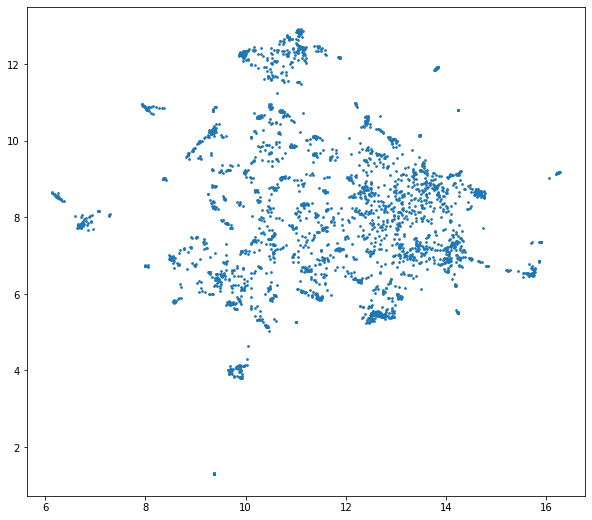

In [ ]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Creating a product dictionary

In [ ]:
products = train_dataset[['StockCode', 'Description']]

products.drop_duplicates(inplace=True, subset='StockCode', keep='last')

products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
products_dict['22748']

["POPPY'S PLAYHOUSE KITCHEN"]

In [ ]:
products_dict['84029G']

['KNITTED UNION FLAG HOT WATER BOTTLE']

## Recommendation Function based on single product vector and will return 6 similar products

In [ ]:
def similar_products(v, n = 6):
  ms = model.similar_by_vector(v, topn = n + 1)[1:]
  new_ms = []
  for j in ms:
    pair = (products_dict[j[0]][0], j[1])
    new_ms.append(pair)
  
  return new_ms

In [ ]:
similar_products(model['84029G'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RED WOOLLY HOTTIE WHITE HEART.', 0.7433902025222778),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.6793884038925171),
 ('RETROSPOT HEART HOT WATER BOTTLE', 0.6675815582275391),
 ('HOT WATER BOTTLE TEA AND SYMPATHY', 0.6539380550384521),
 ('CHOCOLATE HOT WATER BOTTLE', 0.645233154296875),
 ('SCOTTIE DOG HOT WATER BOTTLE', 0.6399728655815125)]

In [ ]:
similar_products(model['90019A'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('SILVER M.O.P ORBIT DROP EARRINGS', 0.7770750522613525),
 ('ANT COPPER RED BOUDICCA BRACELET', 0.7083945274353027),
 ('AMBER DROP EARRINGS W LONG BEADS', 0.704530656337738),
 ('BLUE MURANO TWIST BRACELET', 0.7021508812904358),
 ('DROP DIAMANTE EARRINGS PURPLE', 0.6981218457221985),
 ('VINTAGE ROSE BEAD BRACELET RASPBERR', 0.6878789067268372)]

## Recommendation function based on average of products vector bought by user and will return 6 similar products

In [ ]:
def aggregate_vectors(products):
  product_vec = []
  for i in products:
    try:
      product_vec.append(model[i])
    except KeyError:
      continue
  
  return np.mean(product_vec, axis=0)

In [ ]:
len(purchases_val[0])

1924

In [ ]:
aggregate_vectors(purchases_val[0]).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(100,)

In [ ]:
similar_products(aggregate_vectors(purchases_val[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('LUNCH BAG RED RETROSPOT', 0.6341572999954224),
 ('RED RETROSPOT PICNIC BAG', 0.6334051489830017),
 ('SET/5 RED RETROSPOT LID GLASS BOWLS', 0.6316449642181396),
 ('CREAM HANGING HEART T-LIGHT HOLDER', 0.6272563338279724),
 ('JUMBO BAG RED RETROSPOT', 0.6135257482528687),
 ('POLYESTER FILLER PAD 65CMx65CM', 0.6133203506469727)]

In [ ]:
similar_products(aggregate_vectors(purchases_val[0][-5:]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('GIN AND TONIC DIET METAL SIGN', 0.6582388877868652),
 ('PLEASE ONE PERSON METAL SIGN', 0.6465825438499451),
 ('N0 SINGING METAL SIGN', 0.623363196849823),
 ('COOK WITH WINE METAL SIGN ', 0.616753339767456),
 ('LADIES & GENTLEMEN METAL SIGN', 0.613654613494873),
 ('ASSORTED CIRCULAR MOBILE', 0.610666036605835)]

# <font color="blue">**Churn Prediction**</font>

There's one complication with e-commerce. While it's straightforward to measure churn for a contractual (subscription-based) business, churns aren't explicitly observed in non-contractual businesses (e-commerce). In these scenarios, probabilistic models come in handy for estimating time of customer death. The probabilistic model that I'll use is the BG/NBD model from the Lifetimes package.

In [ ]:
! pip  install lifetimes

     |████████████████████████████████| 593kB 6.9MB/s 


In [ ]:
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive

The Lifetimes package relies on recency-frequency-monetary (RFM) analysis to model churn and customer lifetime value (CLV). To make our models, we'll need a a dataframe that consists of recency, frequency, and monetary columns. The definitions of each are below.


Recency: time between initial purchase and most recent (last) purchase

Frequency: number of repeat purchases made by a customer (total purchases - 1)

Monetary: total spent on purchases

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.341735,-0.219014,0.239846,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.368548,0.076431,0.370534,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.454350,-0.219014,0.788737,1,12,2010,Wednesday,08:26:00,20.34


In [ ]:
transaction_data = dataset[['CustomerID', 'Sales', 'InvoiceDate']]

transaction_data['date'] = pd.to_datetime(transaction_data['InvoiceDate']).dt.date
transaction_data = transaction_data.drop('InvoiceDate', axis=1)

transaction_data.head()

,CustomerID,Sales,date
0,17850.0,15.30,2010-12-01
1,17850.0,20.34,2010-12-01
2,17850.0,22.00,2010-12-01
3,17850.0,20.34,2010-12-01
4,17850.0,20.34,2010-12-01


Now that we have the transaction data, we can convert this into dataframe with the RFM variables. The Lifetimes package has a function for converting transaction data into an RFM DataFrame.

In [ ]:
summary = summary_data_from_transaction_data(transaction_data,'CustomerID','date',monetary_value_col='Sales',)
summary.describe()

,frequency,recency,T,monetary_value
count,4190.000000,4190.000000,4190.000000,4190.000000
mean,2.708353,128.893795,220.929833,168.864397
std,5.656677,131.579600,117.851699,212.490234
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,109.000000,0.000000
50%,1.000000,90.000000,246.000000,120.940000
75%,3.000000,250.000000,324.000000,262.037500
max,129.000000,373.000000,373.000000,3182.320000


### Understanding the RFM DataFrame

In [ ]:
summary.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12347.0,6.0,365.0,367.0,443.973333
12348.0,2.0,110.0,358.0,18.700000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
12352.0,6.0,260.0,296.0,150.423333


The summary function converted customer transactions into an aggregated table. Few of the customers have frequency, recency, and monetary = 0, like customer 12350. That's because Lifetimes only considers customers who have made repeat purchases into account.


Using days as time periods (can also be defined as weeks or months), variables are defined like so for the Lifetimes model:


frequency: # of days in which a customer made a repeat purchase

T: customer's age in days

recency: customer's age in days at time of most recent purchase

monetary_value: mean of a customer's purchases, excluding the 1st purchase


frequency excludes the customer's first purchase because that is considered the day the customer is born. Afterwards, we can begin to question whether or not that customer is alive.

In [ ]:
summary[summary['frequency']>0].head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12347.0,6.0,365.0,367.0,443.973333
12348.0,2.0,110.0,358.0,18.700000
12352.0,6.0,260.0,296.0,150.423333
12356.0,1.0,80.0,325.0,267.860000
12358.0,1.0,149.0,150.0,509.160000


In [ ]:
transaction_data[transaction_data['CustomerID']==12348]

,CustomerID,Sales,date
34085,12348.0,13.2,2010-12-16
34087,12348.0,13.2,2010-12-16
34095,12348.0,13.2,2010-12-16
34097,12348.0,13.2,2010-12-16
70053,12348.0,20.4,2011-01-25
146016,12348.0,17.0,2011-04-05


In [ ]:
summary['frequency'].value_counts()

0.0      1534
1.0       856
2.0       472
3.0       379
4.0       211
5.0       171
6.0       127
7.0        92
8.0        55
9.0        43
10.0       41
11.0       30
12.0       29
14.0       24
16.0       20
13.0       16
19.0       13
15.0       10
17.0        9
20.0        6
24.0        5
22.0        5
18.0        5
23.0        5
25.0        4
27.0        3
21.0        2
36.0        2
34.0        2
87.0        1
30.0        1
33.0        1
111.0       1
63.0        1
109.0       1
29.0        1
38.0        1
31.0        1
58.0        1
37.0        1
35.0        1
129.0       1
41.0        1
53.0        1
89.0        1
32.0        1
28.0        1
26.0        1
Name: frequency, dtype: int64

### Visualizing the RFM DataFrame

We're going to use the Beta-Geometric/NBD (BG/NBD) model for customer churn. The BG/NBD model is an adaptation of the Pareto/NBD model. Both models describe repeat purchasing patterns in businesses where customer turnover is unobserved; however, the BG/NBD is much more computationally feasible.

Assumptions of the BG/NBD model:

<ul>
<li>A customer's relationship has two phases: "alive" for an unobserved period of time, then "dead"</li>
<li>While alive, the number of transactions made by a customer follows a Poisson distribution with transaction rate lambda</li>
<li>Heterogeneity in lambda follows a gamma distribution</li>
<li>After any transaction, a customer dies with probability p; the probability that a customer dies after a number of transactions follows a geometric distribution</li>
<li>p follows a beta distribution</li>
<li>Lambda and p vary independently across customers</li>
</ul>

For more information on the BG/NBD model, check out this <a href="http://brucehardie.com/papers/bgnbd_2004-04-20.pdf">paper</a> and this <a href="https://medium.com/data-shopify/how-shopify-merchants-can-measure-retention-c12284bfed6f">post</a> by Cam Davidson-Pilon.

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 4190 subjects, a: 0.00, alpha: 73.42, b: 14841.26, r: 0.84>

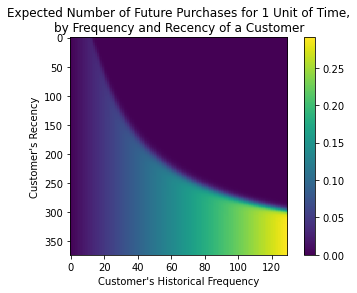

In [ ]:
plot_frequency_recency_matrix(bgf);

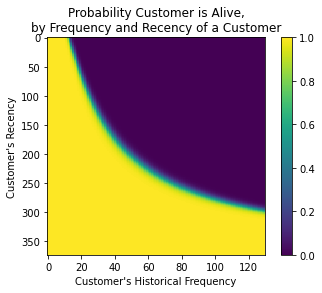

In [ ]:
plot_probability_alive_matrix(bgf);

###Training a model and evaluating model performance

Next we want to evaluate the model to see how well it performs in the future. Lets split the data into a training (calibration) period and a holdout (observation) period, train the BG/NBD model and evaluate performance with four plots that Peter Fader outlines in <a href="https://www.youtube.com/watch?v=guj2gVEEx4s">this talk</a> (@ 26:10). These plots are:

1) Calibration period histogram: does the model fit the training data?

2) Cumulative transaction plot: does the model predict cumulative sales well?

3) Incremental transaction plot: does the model capture the overall trend in transactions?

4) Conditional expectations plot: can the model predict the number of purchases a customer will make based on the training data?



####<b>1) Calibration period histogram</b>

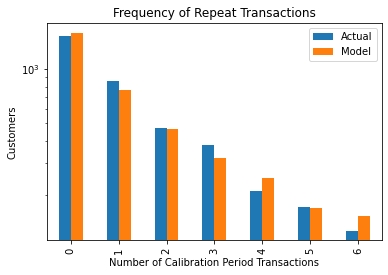

In [ ]:
plot_period_transactions(bgf).set_yscale('log');

The model is fairly representative of the real data up until five repeat transactions. 

####<b>2) Cumulative transaction plot</b>

In [ ]:
summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'CustomerID', 'date',
                                        calibration_period_end='2011-07-31',
                                        observation_period_end='2011-12-09' )

We can evaluate how the dataset works by plotting both of them.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


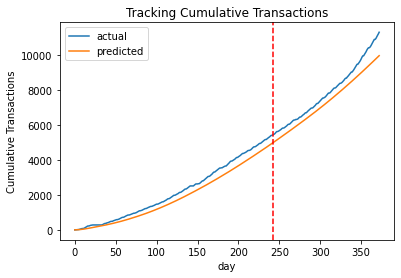

In [ ]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_cumulative_transactions(bgf,transaction_data,'date','CustomerID',373,242);

The red line represents the boundary between the calibration period on the left and the holdout period on the right. As you can see, the BG/NBD model does a pretty swell job at predicting cumulative transactions.

####<b>3) Incremental transaction plot</b>

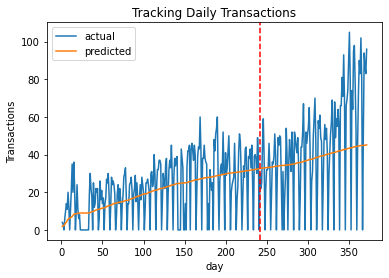

In [ ]:
plot_incremental_transactions(bgf,transaction_data,'date','CustomerID',373,242);

This plot shows that the model does a decent job capturing general trends in the data.

####<b>4) Conditional expectations plot</b>

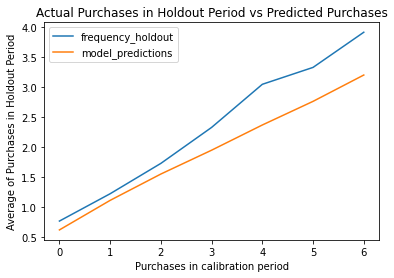

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout);

The model performs well up to three calibration period purchases, but looks to diverge from the holdout data because of the distribution of the data.

In [ ]:
dataset.groupby('CustomerID').size().value_counts()

10      93
5       89
7       82
11      81
6       80
        ..
585      1
581      1
521      1
513      1
1187     1
Length: 421, dtype: int64

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

###Modeling churn risk

The BG/NBD model assumes that death can only occur after a repeat purchase, since the customer leaving occurs during a purchase and the first purchase is reserved to signal a customer's birth.

Because of this, customers with only one transactions will have a 100% probability of being alive, which is suspect. To account for this limitation, we'll only predict churn risk on customers who have made at least one repeat transaction.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


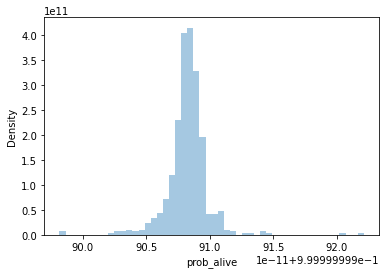

In [ ]:
df = summary[summary['frequency']>0]
df[['frequency', 'recency', 'T']] = StandardScaler().fit_transform(df[['frequency', 'recency', 'T']])
df['prob_alive'] = bgf.conditional_probability_alive(np.log2(df['frequency']),np.log2(df['recency']),np.log2(df['T']))

sns.distplot(df['prob_alive']);

From here, we can visualize customers based on the probability that they're "alive". Using domain knowledge we might be able to set a threshold for customers who probably have already churned, and also identify customers who are at risk for churning, but haven't yet disappeared.



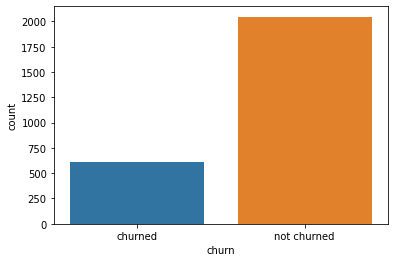

In [ ]:
df['churn'] = ['churned' if p < 0.99999999901 * 90.8 else 'not churned' for p in df['prob_alive']]
sns.countplot(df['churn']);

A little over 600 customers have churned, meaning that there's a lot of opportunity for improvement regarding retention.

We can assume that the customers who have churned are already lost. But what is interesting in a business setting is the customers who are at high risk for churn, but haven't churned yet. Later on, it might still be a good idea to apply different treatments to the churned group.

If we can identify them, maybe we can encourage the marketing team to target them with promotions.

In [ ]:
df['churn'][(df['prob_alive']>=.1) & (df['prob_alive']<.2)] = "high risk"
df['churn'].value_counts()

not churned    2046
churned         610
Name: churn, dtype: int64

In [ ]:
df.head()

,frequency,recency,T,monetary_value,prob_alive,churn
CustomerID,,,,,,
12347.0,0.261060,1.465495,1.063754,443.973333,1.0,churned
12348.0,-0.343452,-0.846122,0.974877,18.700000,NaN,not churned
12352.0,0.261060,0.513653,0.362616,150.423333,1.0,churned
12356.0,-0.494581,-1.118077,0.648996,267.860000,NaN,not churned
12358.0,-0.494581,-0.492580,-1.079161,509.160000,NaN,not churned
